Regresiones para equipos HVAC_DX_Equipment de OpenSimula

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

data = pd.read_excel("HVAC_140_Case_CE100.xlsx", sheet_name="data")
data["T_odb^2"] = data["T_odb"]**2
data["T_iwb^2"] = data["T_iwb"]**2
data["T_odb*T_iwb"] = data["T_odb"]*data["T_iwb"]
X = data[["T_odb", "T_iwb", "T_odb^2","T_iwb^2","T_odb*T_iwb"]].to_numpy()
Q = data["Q_tot"].to_numpy().reshape(-1,1)
P = data["P"].to_numpy().reshape(-1,1)
Q_nom = Q / 7951
P_nom = P/ 2196

In [3]:
model_Q = LinearRegression()
model_Q.fit(X, Q_nom)
Q_reg_coef = model_Q.coef_[0]
Q_reg_coef = np.append(Q_reg_coef,model_Q.intercept_[0])
Q_reg_coef = np.append(Q_reg_coef,model_Q.score(X,Q_nom))
Q_reg_coef

array([ 9.09904181e-04,  4.35080743e-02, -3.47516059e-05,  1.51247038e-04,
       -4.70345729e-04,  4.28083079e-01,  9.99836543e-01])

In [4]:
model_P = LinearRegression()
model_P.fit(X, P_nom)
P_reg_coef = model_P.coef_[0]
P_reg_coef = np.append(P_reg_coef,model_P.intercept_[0])
P_reg_coef = np.append(P_reg_coef,model_P.score(X,P_nom))
P_reg_coef

array([ 1.19823328e-02,  1.43238759e-02,  5.65625462e-05,  3.72452393e-05,
       -1.84024752e-04,  3.45411670e-01,  9.99543821e-01])

In [5]:
def draw_serie(serie,valor,color,eje_x,eje_y,df):
    puntos = df.loc[df[serie] == valor]
    etiqueta = serie + " = " + f'{valor:.2f}'
    plt.scatter(puntos[eje_x],puntos[eje_y],c=color,label=etiqueta)
    plt.legend()

In [6]:
def draw_regresion(x_1,x_2,nominal,model,color):
    if isinstance(x_1,np.ndarray):        
        X = np.zeros([len(x_1),5])
        X[:,0]=x_1
        X[:,1] = x_2
        X[:,2] = x_1*x_1
        X[:,3] = x_2*x_2
        X[:,4] = x_1*x_2
        plt.plot(x_1,nominal*model.predict(X),c=color)
    if isinstance(x_2,np.ndarray):        
        X = np.zeros([len(x_2),5])
        X[:,0]=x_1
        X[:,1] = x_2
        X[:,2] = x_1*x_1
        X[:,3] = x_2*x_2
        X[:,4] = x_1*x_2
        plt.plot(x_2,nominal*model.predict(X),c=color)
    

In [7]:
def draw_puntos(df,eje_x,eje_y,serie,valores,colores):
    for i in range(len(valores)):
        draw_serie(serie, valores[i],colores[i],eje_x,eje_y,df)
    

In [11]:
def draw_curvas(modelo,nominal,T_odb,T_iwb,colores,eje_x):
    if (eje_x == "T_iwb"):
        for i in range(len(T_odb)):
            draw_regresion(T_odb[i], T_iwb, nominal, modelo, colores[i])
    elif (eje_x == "T_odb"):
        for i in range(len(T_iwb)):
            draw_regresion(T_odb, T_iwb[i], nominal, modelo, colores[i])

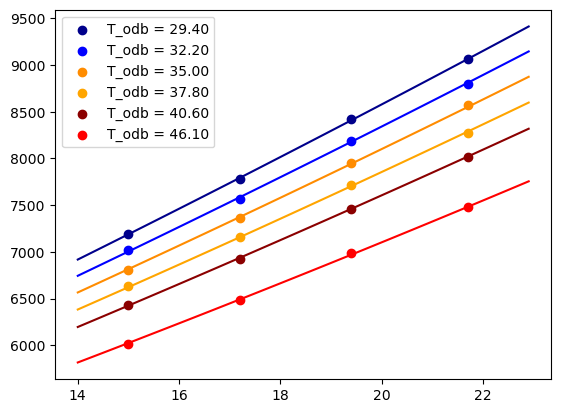

In [12]:
valores_T_odb = [29.4,32.2,35,37.8,40.6,46.1]
colores = ["darkblue","blue","darkorange","orange","darkred","red"]

draw_puntos(data,"T_iwb","Q_tot","T_odb",valores_T_odb,colores)
draw_curvas(model_Q,7951,valores_T_odb, np.arange(14, 23, 0.1), colores,"T_iwb")

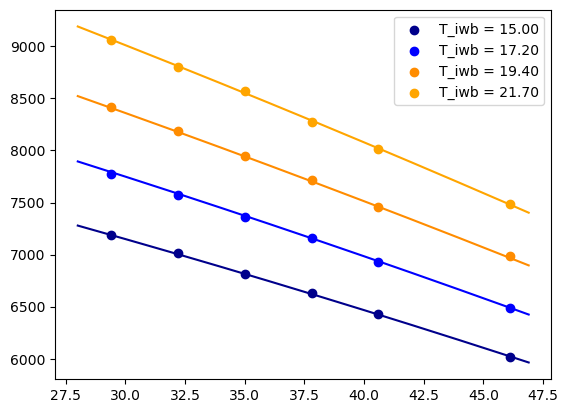

In [13]:
valores_T_iwb = [15,17.2,19.4,21.7]

draw_puntos(data,"T_odb","Q_tot","T_iwb",valores_T_iwb,colores)
draw_curvas(model_Q,7951,np.arange(28, 47, 0.1), valores_T_iwb, colores,"T_odb")


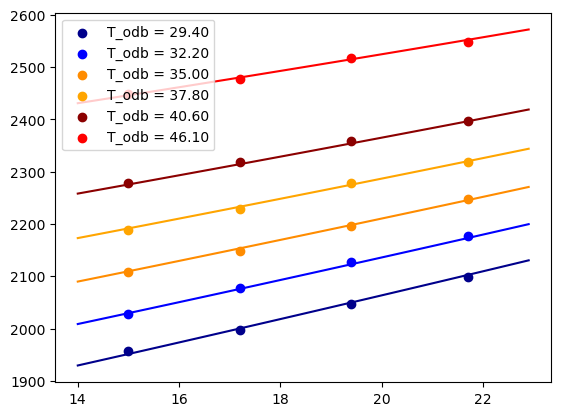

In [14]:
draw_puntos(data,"T_iwb","P","T_odb",valores_T_odb,colores)
draw_curvas(model_P,2196,valores_T_odb, np.arange(14, 23, 0.1), colores,"T_iwb")

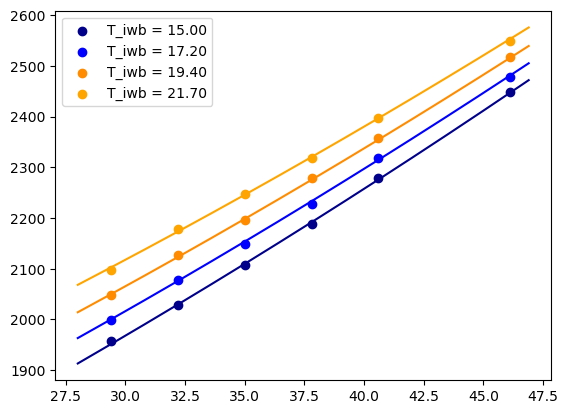

In [16]:
draw_puntos(data,"T_odb","P","T_iwb",valores_T_iwb,colores)
draw_curvas(model_P,2196,np.arange(28, 47, 0.1), valores_T_iwb, colores,"T_odb")

In [18]:
data_sen = pd.read_excel("HVAC_140_Case_CE100.xlsx", sheet_name="sensible_data")
data_sen["T_odb^2"] = data_sen["T_odb"]**2
data_sen["T_iwb^2"] = data_sen["T_iwb"]**2
data_sen["T_idb^2"] = data_sen["T_idb"]**2
data_sen["T_odb*T_iwb"] = data_sen["T_odb"]*data_sen["T_iwb"]
data_sen["T_odb*T_idb"] = data_sen["T_odb"]*data_sen["T_idb"]
data_sen["T_iwb*T_idb"] = data_sen["T_iwb"]*data_sen["T_idb"]
X = data_sen[["T_odb", "T_iwb", "T_idb", "T_odb^2","T_iwb^2","T_idb^2","T_odb*T_iwb","T_odb*T_idb","T_iwb*T_idb"]].to_numpy()
Q = data_sen["Q_sen"].to_numpy().reshape(-1,1)

In [19]:
model_sen = LinearRegression()
Q_nom = Q / 6135
model_sen.fit(X, Q_nom)
Q_reg_coef = model_sen.coef_[0]
Q_reg_coef = np.append(Q_reg_coef,model_sen.intercept_[0])
Q_reg_coef = np.append(Q_reg_coef,model_sen.score(X,Q_nom))
Q_reg_coef

array([ 1.14797797e-03, -7.88581178e-02,  1.04430639e-01, -4.11679273e-05,
       -3.91673921e-03, -2.44975423e-03,  4.04186558e-04, -4.76152463e-04,
        5.50269914e-03,  2.90285382e-01,  9.90543630e-01])

In [22]:
def draw_serie_3(serie_1,valor_1,serie_2,valor_2,color,eje_x,eje_y,df):
    puntos = df.loc[(df[serie_1] == valor_1) & (df[serie_2] == valor_2)]
    etiqueta = serie_1 + " = " + f'{valor_1:.2f}'+", " + serie_2 + " = " + f'{valor_2:.2f}'
    plt.scatter(puntos[eje_x],puntos[eje_y],c=color,label=etiqueta)
    plt.legend()

In [30]:
def draw_puntos_3(df,eje_x,eje_y,serie_1,valor_1,serie_2,valor_2,colores):
    if hasattr(valor_1, "__len__"):
        for i in range(len(valor_1)):
            draw_serie_3(serie_1,valor_1[i],serie_2,valor_2,colores[i],eje_x,eje_y,df)
    if hasattr(valor_2, "__len__") > 1:
        for i in range(len(valor_2)):
            draw_serie_3(serie_1,valor_1,serie_2,valor_2[i],colores[i],eje_x,eje_y,df)
    

In [33]:
def draw_regresion_3(x_1,x_2,x_3,nominal,model,color):
    if isinstance(x_1,np.ndarray):
        x_var = x_1
    if isinstance(x_2,np.ndarray):
        x_var = x_2
    if isinstance(x_3,np.ndarray):
        x_var = x_3
    X = np.zeros([len(x_var),9])
    X[:,0] = x_1
    X[:,1] = x_2
    X[:,2] = x_3
    X[:,3] = x_1*x_1
    X[:,4] = x_2*x_2
    X[:,5] = x_3*x_3
    X[:,6] = x_1*x_2
    X[:,7] = x_1*x_3
    X[:,8] = x_2*x_3
    plt.plot(x_var,nominal*model.predict(X),c=color)    

In [48]:
def draw_curvas_3(modelo,nominal,T_odb,T_iwb, T_idb,colores,eje_x, serie):
    if (eje_x == "T_iwb"):
        if (serie == "T_odb"):
            for i in range(len(T_odb)):
                draw_regresion_3(T_odb[i], T_iwb, T_idb, nominal, modelo, colores[i])
        if (serie == "Tidb"):
            for i in range(len(T_idb)):
                draw_regresion_3(T_odb, T_iwb, T_idb[i], nominal, modelo, colores[i])
    elif (eje_x == "T_odb"):
        if (serie == "T_iwb"):
            for i in range(len(T_iwb)):
                draw_regresion_3(T_odb, T_iwb[i], T_idb, nominal, modelo, colores[i])
        if (serie == "T_idb"):
            for i in range(len(T_idb)):
                draw_regresion_3(T_odb, T_iwb, T_idb[i], nominal, modelo, colores[i])
    elif (eje_x == "T_idb"):
        if (serie == "T_odb"):
            for i in range(len(T_odb)):
                draw_regresion_3(T_odb[i], T_iwb, T_idb, nominal, modelo, colores[i])
        if (serie == "T_iwb"):
            for i in range(len(T_iwb)):
                draw_regresion_3(T_odb, T_iwb[i], T_idb, nominal, modelo, colores[i])

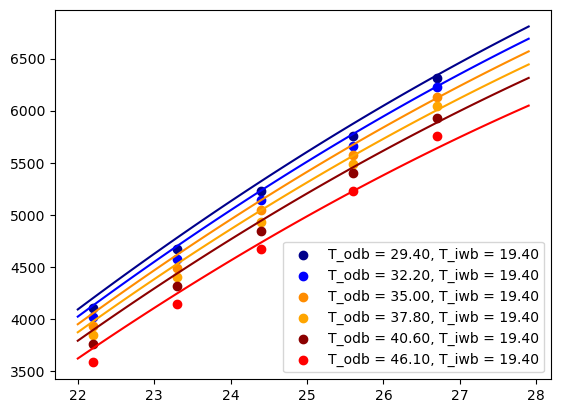

In [49]:
draw_puntos_3(data_sen,'T_idb',"Q_sen","T_odb",valores_T_odb,'T_iwb',19.4,colores)
draw_curvas_3(model_sen,6135,valores_T_odb, 19.4,np.arange(22, 28, 0.1),colores,"T_idb", "T_odb")

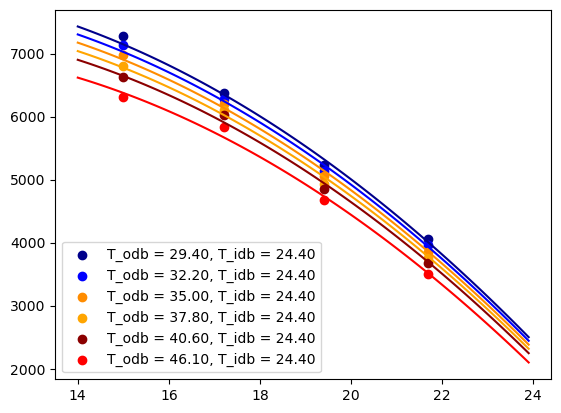

In [50]:
draw_puntos_3(data_sen,'T_iwb',"Q_sen","T_odb",valores_T_odb,'T_idb',24.4,colores)
draw_curvas_3(model_sen,6135,valores_T_odb, np.arange(14, 24, 0.1),24.4,colores,"T_iwb", "T_odb")

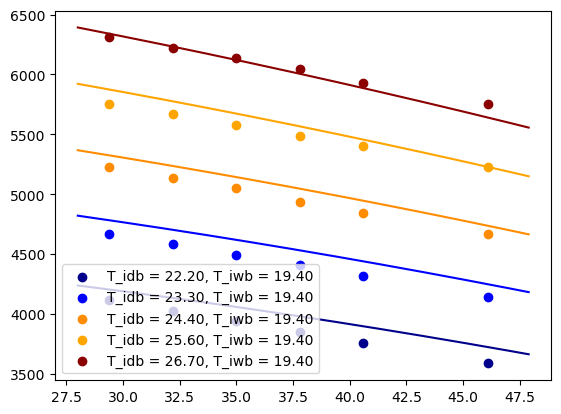

In [52]:
valores_T_idb = [22.2,23.3,24.4,25.6,26.7]
draw_puntos_3(data_sen,'T_odb',"Q_sen","T_idb",valores_T_idb,'T_iwb',19.4,colores)
draw_curvas_3(model_sen,6135,np.arange(28, 48, 0.1), 19.4,valores_T_idb,colores,"T_odb", "T_idb")